In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

# reading data from the Dataset

In [3]:
NFL=pd.read_csv("data.csv",low_memory=False)
NFL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 282.1+ MB


# Data Cleaning

In [4]:
NFL.isnull().any()

Date        False
GameID      False
Drive       False
qtr         False
down         True
            ...  
Win_Prob     True
WPA          True
airWPA       True
yacWPA       True
Season      False
Length: 102, dtype: bool

In [5]:
NFL.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


#### trimming data from the dataset

In [6]:
Steelers = NFL[((NFL["HomeTeam"] == 'PIT') | (NFL["AwayTeam"] == 'PIT')) 
             & (NFL["Season"] == 2016) & (NFL['Touchdown'] == 1)]
grouped = Steelers.groupby(by='Date')
len(grouped)

16

In [8]:
offense = Steelers[(Steelers["DefensiveTeam"] != 'PIT')]

Top_Plays = offense.sort_values(by='Yards.Gained',ascending=False)[:48]

Top_Plays['scorer'] = Top_Plays["Rusher"]
Top_Plays['scorer'].fillna(Top_Plays['Receiver'], inplace = True)

Touchdowns = Top_Plays[['PlayType',
          'down',
          'Yards.Gained',
          'Date',
          'qtr',
          'desc',
          'scorer',
          'Rusher',
          'Receiver']]
Touchdowns.head()

,PlayType,down,Yards.Gained,Date,qtr,desc,scorer,Rusher,Receiver
329328,Pass,3.0,72,2016-10-09,1,(10:25) (Shotgun) B.Roethlisberger pass deep r...,S.Coates,NaN,S.Coates
332020,Run,1.0,60,2016-10-16,1,"(5:52) D.Heyward-Bey left end for 60 yards, TO...",D.Heyward-Bey,D.Heyward-Bey,NaN
327736,Pass,2.0,38,2016-10-02,1,(1:28) B.Roethlisberger pass deep middle to A....,A.Brown,NaN,A.Brown
346084,Pass,2.0,33,2016-11-24,2,(9:08) (Pass formation) B.Roethlisberger pass ...,A.Brown,NaN,A.Brown
327717,Pass,3.0,31,2016-10-02,1,(7:34) (Shotgun) B.Roethlisberger pass deep le...,D.Heyward-Bey,NaN,D.Heyward-Bey


In [9]:
Touchdowns.shape

(48, 9)

In [10]:
Touchdowns.dtypes

PlayType         object
down            float64
Yards.Gained      int64
Date             object
qtr               int64
desc             object
scorer           object
Rusher           object
Receiver         object
dtype: object

In [11]:
Touchdowns.describe()

,down,Yards.Gained,qtr
count,48.000000,48.000000,48.000000
mean,2.145833,15.041667,2.729167
std,0.922291,14.996394,1.283936
min,1.000000,0.000000,1.000000
25%,1.000000,4.000000,1.750000
50%,2.000000,10.000000,3.000000
75%,3.000000,23.000000,4.000000
max,4.000000,72.000000,5.000000


In [12]:
Player = Touchdowns.groupby('scorer')
Player.mean()

,down,Yards.Gained,qtr
scorer,,,
A.Brown,2.416667,20.500000,2.666667
B.Roethlisberger,1.000000,4.000000,4.000000
C.Hamilton,1.500000,24.500000,4.500000
D.Ayers,3.000000,11.000000,4.000000
D.Heyward-Bey,2.333333,35.000000,1.333333
D.Williams,1.833333,6.500000,3.666667
E.Rogers,2.000000,10.000000,2.333333
J.James,1.666667,6.333333,2.333333
L.Bell,1.777778,4.222222,2.444444


# Exploratory Data Analysis

#### results in a graph count vs scorer

C:\Users\sowri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


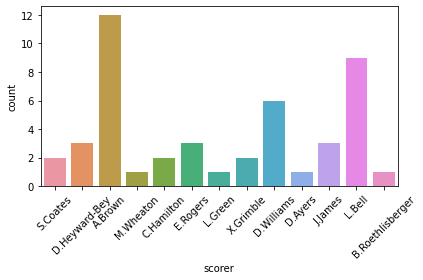

In [13]:
x = sns.countplot(Top_Plays['scorer'])
plt.setp(x.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

#### the below code gives us a graph between count vs playType

<AxesSubplot:xlabel='PlayType', ylabel='count'>

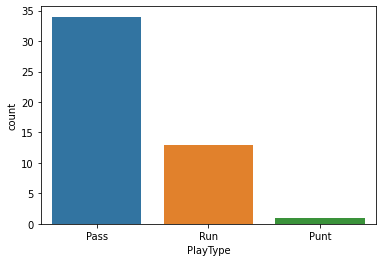

In [14]:
sns.countplot(x="PlayType", data=Top_Plays)

#### Count vs Rusher

<AxesSubplot:xlabel='Rusher', ylabel='count'>

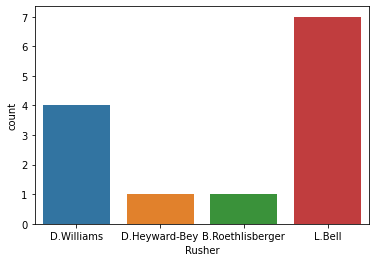

In [16]:
runs = offense[(offense["PlayType"] == 'Run')]
sns.countplot(x="Rusher",data=runs)

# Train and test split

### Using train_test_split, we can easily segment our dataset into training data and testing data. Using these values we can easily build our models and measure the model accuracy.

In [23]:
NFL['ScoreDiff'] = NFL['PosTeamScore'] - NFL['DefTeamScore']

NFL['CurrentScoreBool'] = NFL.apply(lambda x: 1 if x.ScoreDiff > 0 else 0, axis=1)

NFL['TwoMinuteDrill'] = NFL.apply(lambda x: 1 if (
    (((x.TimeSecs <= 0)&(x.TimeSecs >= 120))|((x.TimeSecs <= 1920)&(x.TimeSecs >= 1800)))&
    (x.CurrentScoreBool == 0)) else 0, axis=1)

In [25]:
plays_predictors = ['ydstogo','down','ScoreDiff','No_Score_Prob','Drive','Season','TimeSecs','TimeUnder','PlayTimeDiff','Opp_Field_Goal_Prob']
X = NFL[plays_predictors]
y = NFL.PlayType

In [28]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [34]:
train_X.head()

,ydstogo,down,ScoreDiff,No_Score_Prob,Drive,Season,TimeSecs,TimeUnder,PlayTimeDiff,Opp_Field_Goal_Prob
77272,0,NaN,NaN,0.000000,10,2010,1849.0,1,0.0,0.000000
149007,0,NaN,3.0,0.143831,21,2012,630.0,11,0.0,0.148222
45035,10,1.0,0.0,0.012761,15,2010,1212.0,6,44.0,0.137387
63786,12,3.0,3.0,0.208237,9,2010,2144.0,6,43.0,0.080257
91543,2,2.0,-6.0,0.003951,16,2011,1346.0,8,30.0,0.066307


In [31]:
val_X.head()

,ydstogo,down,ScoreDiff,No_Score_Prob,Drive,Season,TimeSecs,TimeUnder,PlayTimeDiff,Opp_Field_Goal_Prob
1983,0,NaN,-14.0,0.748181,13,2009,1812.0,1,0.0,0.040584
190399,8,2.0,4.0,0.002283,15,2013,1612.0,12,35.0,0.134850
135490,0,NaN,0.0,0.001506,1,2012,3600.0,15,0.0,0.179749
60161,1,3.0,7.0,0.006194,3,2010,3248.0,10,40.0,0.205617
177931,10,1.0,-9.0,0.158707,24,2012,539.0,9,42.0,0.110898


In [32]:
train_y.head()

77272     Timeout
149007    Kickoff
45035        Pass
63786     No Play
91543        Pass
Name: PlayType, dtype: object

In [33]:
val_y.head()

1983      Kickoff
190399        Run
135490    Kickoff
60161         Run
177931       Pass
Name: PlayType, dtype: object